In [20]:
rm(list=ls())
library(caTools)
library(ggplot2)
library('mlbench')
library("scatterplot3d")

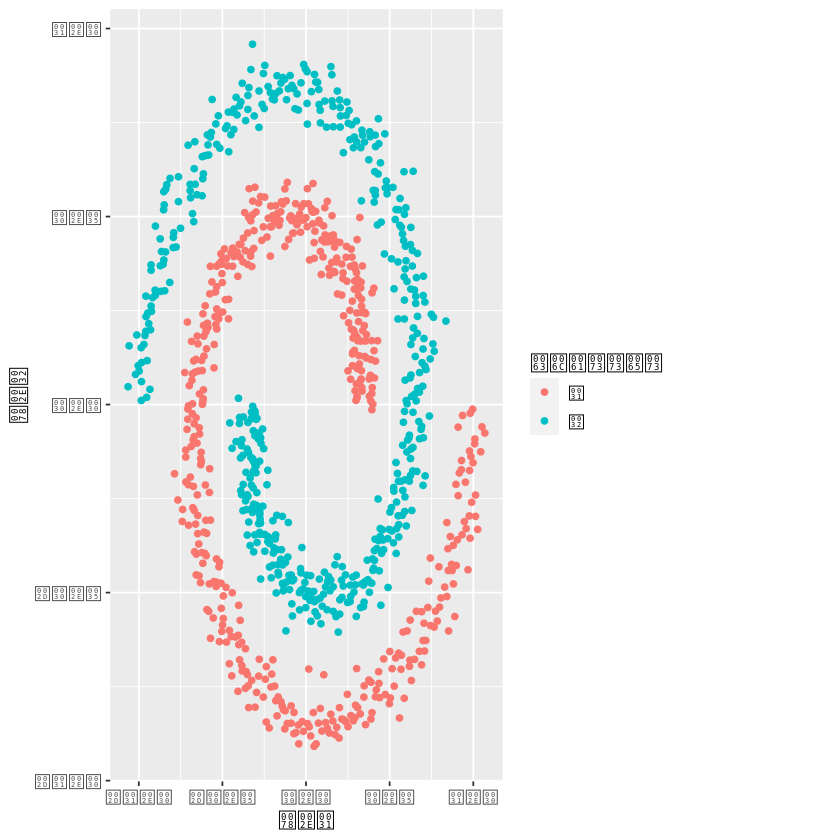

In [68]:
spirals = mlbench.spirals(1000,1,0.05)
spirals2 = data.frame(spirals)
amostra = matrix(unlist(spirals$x), ncol = 2)
classeAmost = matrix(unlist(spirals$classes))
ggplot(data = spirals2, aes (x.1, x.2,color=classes)) + geom_point()


In [38]:
porcTrain = 0.75
qtdTrain = nrow(amostra)*porcTrain
sampleA = sample(nrow(amostra))

X_train = amostra[sampleA[0:qtdTrain],]
Y_train = classeAmost[sampleA[0:qtdTrain],]

X_test = amostra[sampleA[qtdTrain:nrow(amostra)],]
Y_test = classeAmost[sampleA[(nrow(amostra)*porcTrain):(nrow(amostra))],]

In [39]:
generateCentro <- function(k){
    centro = matrix(0, ncol = 2, nrow=k)
    for(i in 1:k){
        centro[i,]= rnorm(2, mean=runif(1,-1,1), sd=0.3)
    }
    return(centro)
}
clusters <- function(X,p,centro){
    dims = dim(X)[1]
    pos = 1
    classe = matrix(0, ncol = 1, nrow = dims)
    qtdCentro <- dim(centro)[1]
    dist = matrix(0, nrow=qtdCentro)
    for(i in 1:dims){
        for(j in 1:qtdCentro){
            dist[j] = dist_Manhattan(p, X[i,],centro[j,] )
            
        }
        p = match(min(dist),dist)
        

        classe[i] = p
        
    }
    
    for(t in 1: qtdCentro){
        if(sum(classe == t) == 0){
            random = as.integer(runif(1,1,dims))
            classe[random] = t
        }
    }
    
    return(classe)
    
}

updateValueCenter <- function(classe,X,k){
    row = dim(classe)[1]
    
    centro = matrix(0, nrow = k, ncol=2)
    qtd = matrix(0, nrow=k)
    
    for(i in 1:row){
        for(j in 1:k){
           qtd[j] = sum(classe==j)
            
            if(classe[i] == (j)){
                centro[j,1] = centro[j,1] + X[i,1]
                centro[j,2] = centro[j,2] + X[i,2]
            }
            
        }
          
    }
    
    for(j in 1:k){
        centro[j,1] =  centro[j,1]/ qtd[j]
        centro[j,2] =  centro[j,2]/ qtd[j]
        
    }
    
    return(centro)
    
    
}

getColors <- function(classe,k){
    color = rainbow(k)
    row = dim(classe)[1]
    colors = matrix('', ncol = row)
    for(i in 1:row){
        for(j in 1:k){
           if(classe[i] == j){
                colors[i] = color[j]
            }
        }
   
    }
    return(colors)
}

dist_Manhattan <- function(p,x,centro){
    dist = 0
    
    dist = (x[1] - centro[1])^p + (x[2] - centro[2])^p
    dist= abs(dist) ^ (1/p)  
            
    return(dist)
}

funcaoProbabilidade <- function(u1,u2,std1,std2,p,xu1, xu2){
    
    A = 1/(2*pi * std1*std2 * (1 - (p)^2)^(1/2) )
    
    B = -1/(2*(1-p^2))
    C = ((xu1 - u1)/std1)^2
    D = (-2*p)*((xu1 - u1)/std1) *((xu2 - u2)/std2)
    E =  ((xu2 - u2)/std2)^2
    
    
    F = exp(B*(C + D + E))
    
    G = A * F
    
    if(is.na(G)){
        G = 0
    }
    
    return(G)
}


In [40]:
k = 30
centro = generateCentro(k)


In [41]:
classe = clusters(X_train,k,centro);



[1] 389
[1] 633
[1] 678
[1] 689
[1] 719
[1] 718
[1] 709
[1] 708
[1] 725
[1] 721
[1] 733
[1] 736
[1] 740
[1] 739
[1] 745
[1] 746
[1] 748
[1] 749
[1] 750


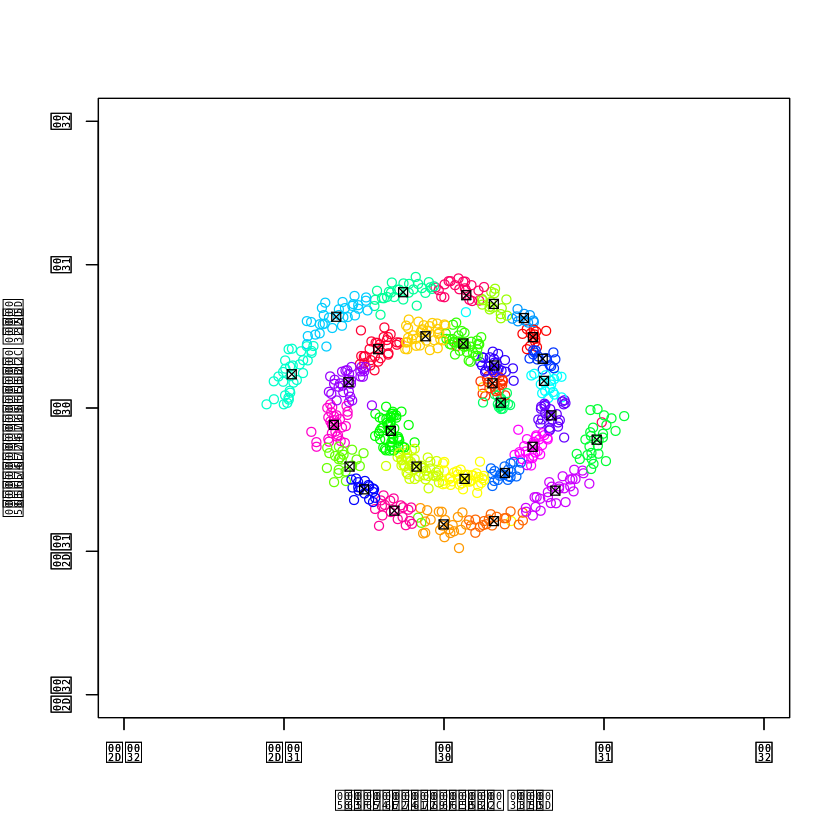

In [42]:
qtd = 0
k = 30
ClassAreDiff = 0
qtdEqual = 0
p = 4
centro = generateCentro(k)
classe = clusters(X_train,p,centro);



while(ClassAreDiff == 0 &&  qtd < 30){
   centro = updateValueCenter(classe,X_train,k)
   classUpdate = clusters(X_train,k,centro) 
   
   qtdEqual = sum(classUpdate == classe)
    print(qtdEqual)
    
   qtd = qtd + 1
    
   
   if(qtdEqual == (dim(X_train)[1])){
      ClassAreDiff = 1
   }
       
   else 
     classe = classUpdate  

}

colors = getColors(classe,k)
plot(X_train[,1],X_train[,2],xlim=c(-2,2), ylim=c(-2,2), col=colors)
par(new=TRUE)
plot(centro[,1], centro[,2],xlim=c(-2,2), ylim=c(-2,2),pch=7,col='black')


In [43]:
pdf_nvar <- function(x, m, K, n){
    aux = 0
    aux2 = 0
  if(ncol(matrix(K)) == 1){
      aux = K
      aux2 = 1/K
  }
      
  else {
      aux = det(K)
      aux2 = solve(K)
    }
  #a <- ((1/(sqrt((2*pi)^n *(det(K)))))*exp(−0.5*(t(x−m) % * %(solve(K))% * %(x − m)))
  a <- (1/(sqrt((2*pi)^n *(aux))))*exp(-0.5*(t(x-m) %*%(aux2)%*%(x - m)))
  return(a)
}



Y1 = as.matrix(Y_train)
X1= as.matrix(X_train)
PC1  = (dim(X1[Y1=='1',])[1])/(dim(X1[Y1=='1',])[1] + dim(X1[Y1=='2',])[1])
PC2  = (dim(X1[Y1=='2',])[1])/(dim(X1[Y1=='1',])[1] + dim(X1[Y1=='2',])[1])

In [44]:
PC1
PC2

[1] 0.4906667

[1] 0.5093333

In [45]:
getOfKCluster <- function(X,Y,k,classe){
    qtd = sum(classe == k)
    amostraX = matrix(0, ncol=2, nrow = qtd)
    amostraY = matrix(0, ncol = 1, nrow = qtd)
    pos = 1
    for(i in 1:dim(classe)[1]){
        if(classe[i] == k){
            amostraX[pos] = X[i,1]
            amostraX[pos,2] = X[i,2]

            amostraY[pos] = Y[i]
            pos = pos + 1
        }
    }
    
    return(list(X =amostraX, Y = amostraY))
}

In [46]:
validacaoCruzada <- function(X,Y,k,sample,t){
    dims = dim(X)[1]/t
    X_test = X[sample[((k-1)*dims + 1):(k*dims)],]
    Y_test = Y[sample[((k-1)*dims + 1):(k*dims)]]
    
    X_train = X[-sample[((k-1)*dims + 1):(k*dims)],]
    Y_train = Y[-sample[((k-1)*dims + 1):(k*dims)]]
    
    
    return(list(X_train = X_train,Y_train = Y_train, X_test = X_test,Y_test= Y_test))
     
}

In [47]:
porcTrain = 0.75
mC1 = matrix(0, nrow =k, ncol=2)
sdC1 = matrix(0, nrow =k, ncol=2)
KC1 = matrix(0, nrow =k)
mC2 = matrix(0, nrow =k, ncol=2)
sdC2 = matrix(0, nrow =k, ncol=2)
KC2 = matrix(0, nrow =k)

piK = matrix(0, nrow = k)
for(i in 1:k){
    saida = getOfKCluster(X1,Y1,i,classe);
    Y = saida$Y
    X = saida$X
    
    piK[i] = nrow(X)/(nrow(X1))
   if(nrow(matrix(X[Y=='1',], ncol=2))>0){
        mC1[i,1] = colMeans(matrix(X[Y=='1',1]))
        mC1[i,2] = colMeans(matrix(X[Y=='1',2]))
       
        sdC1[i,1] = sd(matrix(X[Y=='1',1]))
        sdC1[i,2] = sd(matrix(X[Y=='1',2]))
        
        KC1[i] = cov(X[Y=='1',],X[Y=='1',])[1]
     
    }else{
        mC1[i] = 0
        sdC1[i,] = 0
        KC1[i] = 0
    }
    
    if(nrow(matrix(X[Y=='2',], ncol=2))>0){
        mC2[i,1] = colMeans(matrix(X[Y=='2',1]))
        mC2[i,2] = colMeans(matrix(X[Y=='2',2]))
        
        sdC2[i,2] = sd(matrix(X[Y=='2',2]))
        sdC2[i,1] = sd(matrix(X[Y=='2',1]))
       
        KC2[i] = cov(X[Y=='2',],X[Y=='2',])[1]
        
    }else{
        
        mC2[i] = 0
        sdC2[i,] = 0
        KC2[i] = 0 
    }
}


In [48]:
qtd = 100
test = matrix(0, nrow= qtd^2, ncol=2)
vectorX = seq(-1, 1, len=qtd)
vectorY = seq(-1, 1, len=qtd)
count = 0
for(i in 1:qtd){
    for(j in 1:qtd){
        count = count + 1
        test[count,1] = vectorX[i]
        test[count,2] = vectorY[j]
    
    }
  
}

In [49]:
classeAprox = matrix(0, ncol = dim(X_test)[1])

for(j in 1:nrow(X_test)){
    probC1 = 0
    probC2 = 0

    for(i in 1:k){
        
        probC1 = probC1 + piK[i] *funcaoProbabilidade(mC1[i,1],mC1[i,2],sdC1[i,1],sdC1[i,2],KC1[i],X_test[j,1],X_test[j,2])
      

        probC2 = probC2 +  piK[i] *funcaoProbabilidade(mC2[i,1],mC2[i,2],sdC2[i,1],sdC2[i,2],KC2[i],X_test[j,1],X_test[j,2])
        
    }

    K = (probC1 *PC1)/(probC2 *PC2)
    if(K >= 1){
      classeAprox[j] = 1  
    }else{
        classeAprox[j] = 2
    }
    
}
    cmTest = as.matrix(table(Actual = Y_test, Predicted = classeAprox)) # create the confusion matrix
    n = sum(cmTest)
    diag = diag(cmTest)
    acuraciaTest = sum(diag) / n
    
    print(paste(' Acuracia:',acuraciaTest))
    


[1] " Acuracia: 1"


In [50]:
classeAprox = matrix(0, nrow = dim(test)[1])
probC1 = matrix(0, nrow = dim(test)[1])
probC2 = matrix(0, nrow = dim(test)[1])
for(j in 1:nrow(test)){


    for(i in 1:k){
        
        probC1[j] = probC1[j] + piK[i] *funcaoProbabilidade(mC1[i,1],mC1[i,2],sdC1[i,1],sdC1[i,2],KC1[i],test[j,1],test[j,2])
      

        probC2[j] = probC2[j] +  piK[i] *funcaoProbabilidade(mC2[i,1],mC2[i,2],sdC2[i,1],sdC2[i,2],KC2[i],test[j,1],test[j,2])
        
    }

    K = (probC1[j] *PC1)/(probC2[j] *PC2)
    if(K >= 1){
      classeAprox[j] = 1  
    }else{
        classeAprox[j] = 2
    }
    
}

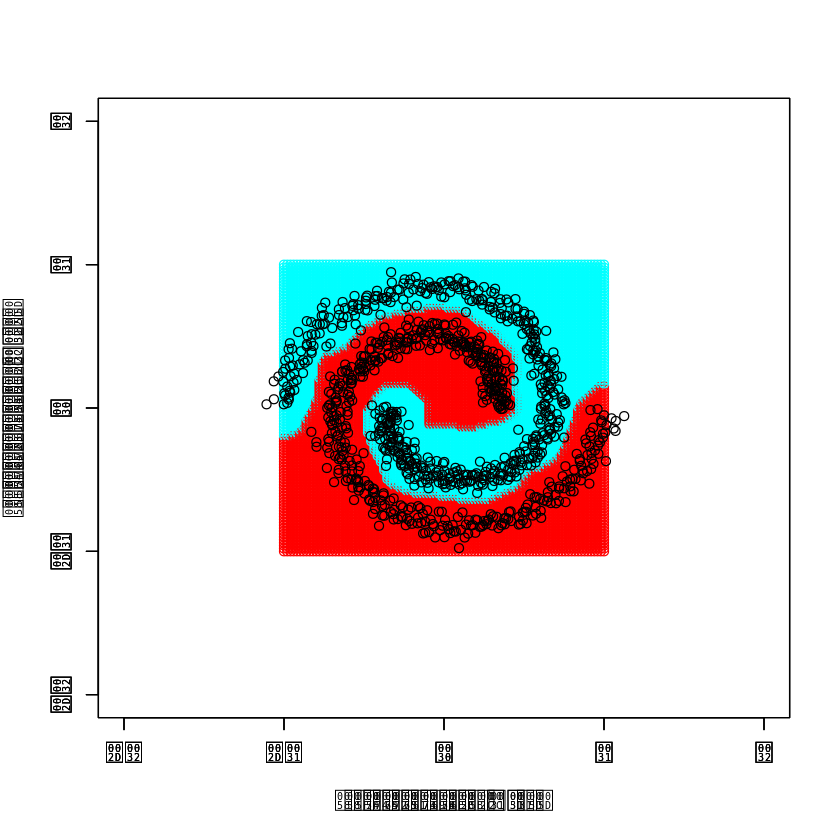

In [51]:
colors = getColors(matrix(classeAprox),2)
plot(test[,1],test[,2],xlim=c(-2,2), ylim=c(-2,2), col=colors)
par(new=TRUE)
plot(X_train[,1],X_train[,2],xlim=c(-2,2), ylim=c(-2,2), col= 'black')
par(new=TRUE)
plot(X_test[,1],X_test[,2],xlim=c(-2,2), ylim=c(-2,2), col= 'black' )

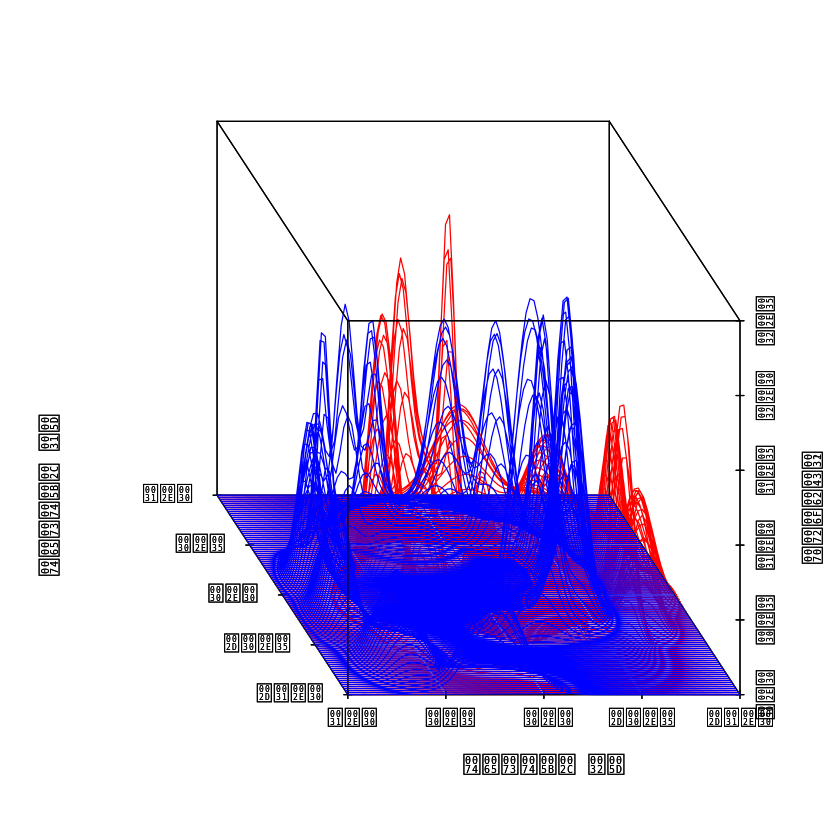

In [52]:
scatterplot3d(x = test[,1], y = test[,2], z = probC1, angle= -60,color ='red',type = 'l')
par(new=TRUE)
scatterplot3d(x = test[,1], y = test[,2], z = probC2, angle =-60, color ='blue',type = 'l')

In [77]:
qtd = 0
k = 30
ClassAreDiff = 0
qtdEqual = 0
p = 4
validacao = 20
centro = generateCentro(k)
sampleA = sample(1000)
acuraciaTest = matrix(0, nrow = validacao)
for(t in 1:validacao){
    saida = validacaoCruzada(amostra,classeAmost,t,sampleA,validacao)

    classe = clusters(X_train,p,centro);
    X_test = saida$X_test
    Y_test = saida$Y_test
    X_train = saida$X_train
    Y_train = saida$Y_train

    N = nrow(X_train)


    while(ClassAreDiff == 0 &&  qtd < 30){
       centro = updateValueCenter(classe,X_train,k)
       classUpdate = clusters(X_train,k,centro) 

       qtdEqual = sum(classUpdate == classe)

       qtd = qtd + 1


       if(qtdEqual == (dim(X_train)[1])){
          ClassAreDiff = 1
       }

       else 
         classe = classUpdate  

    }

    Y1 = as.matrix(Y_train)
    X1= as.matrix(X_train)
    PC1  = (dim(X1[Y1=='1',])[1])/(dim(X1[Y1=='1',])[1] + dim(X1[Y1=='2',])[1])
    PC2  = (dim(X1[Y1=='2',])[1])/(dim(X1[Y1=='1',])[1] + dim(X1[Y1=='2',])[1])


    porcTrain = 0.3
    mC1 = matrix(0, nrow =k, ncol=2)
    sdC1 = matrix(0, nrow =k, ncol=2)
    KC1 = matrix(0, nrow =k)
    mC2 = matrix(0, nrow =k, ncol=2)
    sdC2 = matrix(0, nrow =k, ncol=2)
    KC2 = matrix(0, nrow =k)

    piK = matrix(0, nrow = k)
    for(i in 1:k){
        saida = getOfKCluster(X1,Y1,i,classe);
        Y = saida$Y
        X = saida$X

        piK[i] = nrow(X)/(nrow(X1))
       if(nrow(matrix(X[Y=='1',], ncol=2))>0){
            mC1[i,1] = colMeans(matrix(X[Y=='1',1]))
            mC1[i,2] = colMeans(matrix(X[Y=='1',2]))

            sdC1[i,1] = sd(matrix(X[Y=='1',1]))
            sdC1[i,2] = sd(matrix(X[Y=='1',2]))

            KC1[i] = cov(X[Y=='1',],X[Y=='1',])[1]

        }else{
            mC1[i] = 0
            sdC1[i,] = 0
            KC1[i] = 0
        }

        if(nrow(matrix(X[Y=='2',], ncol=2))>0){
            mC2[i,1] = colMeans(matrix(X[Y=='2',1]))
            mC2[i,2] = colMeans(matrix(X[Y=='2',2]))

            sdC2[i,2] = sd(matrix(X[Y=='2',2]))
            sdC2[i,1] = sd(matrix(X[Y=='2',1]))

            KC2[i] = cov(X[Y=='2',],X[Y=='2',])[1]

        }else{

            mC2[i] = 0
            sdC2[i,] = 0
            KC2[i] = 0 
        }
    }

    classeAprox = matrix(0, ncol = dim(X_test)[1])

    for(j in 1:nrow(X_test)){
        probC1 = 0
        probC2 = 0

        for(i in 1:k){

            probC1 = probC1 + piK[i] *funcaoProbabilidade(mC1[i,1],mC1[i,2],sdC1[i,1],sdC1[i,2],KC1[i],X_test[j,1],X_test[j,2])


            probC2 = probC2 +  piK[i] *funcaoProbabilidade(mC2[i,1],mC2[i,2],sdC2[i,1],sdC2[i,2],KC2[i],X_test[j,1],X_test[j,2])

        }

        K = (probC1 *PC1)/(probC2 *PC2)
        if(K >= 1){
          classeAprox[j] = 1  
        }else{
            classeAprox[j] = 2
        }

    }
        cmTest = as.matrix(table(Actual = Y_test, Predicted = classeAprox)) # create the confusion matrix
        n = sum(cmTest)
        diag = diag(cmTest)
        acuraciaTest[t] = sum(diag) / n


        print(paste('Validacao cruzada folder=',t,' Acuracia:',acuraciaTest[t]))


}
    


[1] "Validacao cruzada folder= 1  Acuracia: 1"
[1] "Validacao cruzada folder= 2  Acuracia: 0.98"
[1] "Validacao cruzada folder= 3  Acuracia: 0.94"
[1] "Validacao cruzada folder= 4  Acuracia: 0.94"
[1] "Validacao cruzada folder= 5  Acuracia: 0.98"
[1] "Validacao cruzada folder= 6  Acuracia: 0.9"
[1] "Validacao cruzada folder= 7  Acuracia: 0.96"
[1] "Validacao cruzada folder= 8  Acuracia: 0.96"
[1] "Validacao cruzada folder= 9  Acuracia: 0.86"
[1] "Validacao cruzada folder= 10  Acuracia: 0.96"
[1] "Validacao cruzada folder= 11  Acuracia: 1"
[1] "Validacao cruzada folder= 12  Acuracia: 0.96"
[1] "Validacao cruzada folder= 13  Acuracia: 0.74"
[1] "Validacao cruzada folder= 14  Acuracia: 0.88"
[1] "Validacao cruzada folder= 15  Acuracia: 0.96"
[1] "Validacao cruzada folder= 16  Acuracia: 0.94"
[1] "Validacao cruzada folder= 17  Acuracia: 0.88"
[1] "Validacao cruzada folder= 18  Acuracia: 0.94"
[1] "Validacao cruzada folder= 19  Acuracia: 0.96"
[1] "Validacao cruzada folder= 20  Acuracia: 1"

In [78]:
mean(acuraciaTest)

[1] 0.937

In [79]:
sd(acuraciaTest)

[1] 0.06131026